In [475]:
import requests
import pandas as pd
url = "https://free-nba.p.rapidapi.com/stats"

# Headers removed

querystring = {"page":1,"per_page":"1000"}
response = requests.request("GET", url, headers=headers, params=querystring)
df = pd.DataFrame.from_dict(response.json()['data'])

for page in range(2, 30): # Getting data from each page using for loop
    querystring = {"page":str(page),"per_page":"100"}
    response = requests.request("GET", url, headers=headers, params=querystring)
    df2 = pd.DataFrame.from_dict(response.json()['data'])
    df = df.append(df2, ignore_index=True)
df

,id,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,fgm,...,game,min,oreb,pf,player,pts,reb,stl,team,turnover
0,1069008,0.0,1.0,2.0,0.2,5.0,1.0,0.333,9.0,3.0,...,"{'id': 45237, 'date': '2019-01-17T00:00:00.000...",20:08,0.0,0.0,"{'id': 415, 'first_name': 'Iman', 'height_feet...",7.0,2.0,0.0,"{'id': 26, 'abbreviation': 'SAC', 'city': 'Sac...",2.0
1,1069009,4.0,0.0,5.0,0.0,2.0,0.0,0.2,5.0,1.0,...,"{'id': 45237, 'date': '2019-01-17T00:00:00.000...",19:22,1.0,1.0,"{'id': 49, 'first_name': 'Nemanja', 'height_fe...",2.0,6.0,0.0,"{'id': 26, 'abbreviation': 'SAC', 'city': 'Sac...",0.0
2,1069010,4.0,1.0,5.0,0.0,0.0,0.0,0.667,6.0,4.0,...,"{'id': 45237, 'date': '2019-01-17T00:00:00.000...",27:24,6.0,2.0,"{'id': 91, 'first_name': 'Willie', 'height_fee...",8.0,11.0,3.0,"{'id': 26, 'abbreviation': 'SAC', 'city': 'Sac...",2.0
3,1069011,1.0,0.0,1.0,0.545,11.0,6.0,0.5,18.0,9.0,...,"{'id': 45237, 'date': '2019-01-17T00:00:00.000...",32:06,0.0,2.0,"{'id': 210, 'first_name': 'Buddy', 'height_fee...",24.0,1.0,2.0,"{'id': 26, 'abbreviation': 'SAC', 'city': 'Sac...",0.0
4,1069012,8.0,1.0,5.0,0.0,2.0,0.0,0.4,10.0,4.0,...,"{'id': 45237, 'date': '2019-01-17T00:00:00.000...",30:30,0.0,4.0,"{'id': 161, 'first_name': 'De'Aaron', 'height_...",10.0,5.0,1.0,"{'id': 26, 'abbreviation': 'SAC', 'city': 'Sac...",4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,350787,None,None,None,None,None,NaN,None,None,NaN,...,"{'id': 13062, 'date': '2003-02-28T00:00:00.000...",None,None,None,"{'id': 1326, 'first_name': 'Slava', 'height_fe...",NaN,None,None,"{'id': 14, 'abbreviation': 'LAL', 'city': 'Los...",None
2896,351047,None,None,None,None,None,NaN,None,None,NaN,...,"{'id': 13064, 'date': '2003-03-02T00:00:00.000...",None,None,None,"{'id': 1432, 'first_name': 'Igor', 'height_fee...",NaN,None,None,"{'id': 18, 'abbreviation': 'MIN', 'city': 'Min...",None
2897,351048,None,None,None,None,None,NaN,None,None,NaN,...,"{'id': 13064, 'date': '2003-03-02T00:00:00.000...",None,None,None,"{'id': 957, 'first_name': 'Joe', 'height_feet'...",NaN,None,None,"{'id': 18, 'abbreviation': 'MIN', 'city': 'Min...",None
2898,351122,None,None,None,None,None,NaN,None,None,NaN,...,"{'id': 13478, 'date': '2003-03-02T00:00:00.000...",None,None,None,"{'id': 954, 'first_name': 'Jason', 'height_fee...",NaN,None,None,"{'id': 17, 'abbreviation': 'MIL', 'city': 'Mil...",None


## Questions to Ask About the Data ##

1. Can we calculate minutes played using points, rebounds and field goal attempts with linear regression?
2. Can we use logistic regression to predict if a player is a center?
3. Can we determine the "style" of player using clustering?


# Cleaning the Data #

In [476]:
df = df.drop('game', axis=1).dropna() # Dropping game column because we never use its data
df = df.reset_index().drop('index', axis=1).drop('id', axis=1) # Dropping other useless columns such as index and game id then resetting the indexes

# Adding new position column because we need binary data for logistic regression
# If the position of the player is a center, then set the value to 1, otherwise set it to 0
df['position'] = [1 if df.iloc[i]['player']['position']=='C' else 0 for i,j in df.iterrows()]

# Dropping the player and team columnsm because we no longer need their data
df = df.drop('player', axis=1).drop('team', axis=1)

In [477]:
# For each entry convert the minutes played into a value that can be changed into a float so we can use operations on it
for i,j in df.iterrows():
    splice = str(str(df.iloc[i]['min']).split(":")).split(" ")
    minutes = float(splice[0][2:-2])
    seconds = round(float(splice[1][1:-2])/60, 2)
    time = minutes+seconds
    df.at[i, 'min'] = time
    
df = df.astype({'position': float}).astype({'min': float}) # Changing the two columns to floats

# Basic Statistics #

(ast          2.273894
 blk          0.436519
 dreb         3.134094
 fg3_pct      0.258200
 fg3a         2.918688
 fg3m         1.074180
 fg_pct       0.429738
 fga          8.042796
 fgm          3.721826
 ft_pct       0.432863
 fta          2.079886
 ftm          1.599144
 min         22.054365
 oreb         0.915835
 pf           1.901569
 pts         10.116976
 reb          4.049929
 stl          0.667618
 turnover     1.253923
 position     0.114123
 dtype: float64,
             fg3m         fgm      ft_pct         fta         ftm         min  \
 count  701.00000  701.000000  701.000000  701.000000  701.000000  701.000000   
 mean     1.07418    3.721826    0.432863    2.079886    1.599144   22.054365   
 std      1.44130    2.981073    0.433928    2.684220    2.246381   10.243737   
 min      0.00000    0.000000    0.000000    0.000000    0.000000    1.030000   
 25%      0.00000    1.000000    0.000000    0.000000    0.000000   14.820000   
 50%      1.00000    3.000000    0.50

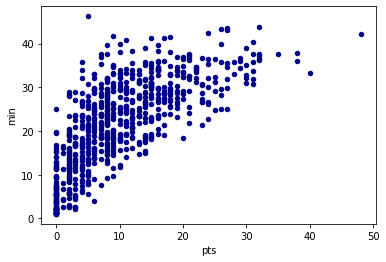

In [479]:
ax1 = df.plot.scatter(x='pts', y='min', c='DarkBlue')
df.mean(), df.describe()

# 1. Linear Regression #
Seeing if we can predict minutes played based off of points, assists, field goal attemps and assists 

In [480]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.cluster
from sklearn.linear_model import LinearRegression, Lasso
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics.tests.test_regression import r2_score, mean_squared_error
import random
import seaborn as sns
%matplotlib inline

# Multi-element Linear Regression Model

multi_element_model = LinearRegression()
train_set = pd.DataFrame()
test_set = pd.DataFrame()

y_minutes = df[["min"]] # Trying to predict minutes played
x_multi = df[["pts", "reb", "fga", "ast"]] # Using the most correlated features of minutes played

x_train_set, x_test_set, y_train_set, y_test_set = train_test_split(x_multi, y_minutes, test_size=0.3, random_state=42)

multi_element_model.fit(X=x_train_set, y=y_train_set)
print(f"y = {multi_element_model.coef_[0]}x + {multi_element_model.intercept_}")

y = [0.14761317 0.79844656 0.91529978 0.70936174]x + [8.58917899]


In [481]:
# r-squared value for the linear regression model
y_predicted = multi_element_model.predict(x_test_set)
r2_multi = r2_score(y_test_set, y_predicted)
r2_multi

0.6490924014486492

### Analyzing the Model ###

Overall this model isn't predictive or accurate. Even though we used the most correlated statistics for each game the model can never be 100% accurate because there is so much more to account for than just statistics. For example, one player can have a really good game where the model may think they played more time than they actually did or a player can play a lot of minutes but have a really bad game overall. The r-squared score shows that it is somewhat correlated, it's no where near high enough to be useful or accurate. To make the model better we could maybe get all the statistics for a player over the course of his entire season. To predict statistics solely based off of one game stats will always be impossible to predict.

# 2. Logistic Regression
Seeing if we can predict if the player is a center based off of rebounds, blocks, field goal percentage and offensive and defensive rebounds in a game

In [482]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score

y_position = df['position']
anomaly_y = ((1.0 == y)) # Making the anomaly column, results in true if the player is a center

X_logistic_multi = df[["reb", "blk", "fg_pct","oreb", "dreb"]] # Using the most correlated statistics of a center

X_train, X_test, y_train, y_test = train_test_split(X_logistic_multi, anomaly_y, train_size=0.3, random_state=42)

In [483]:
# Creating and evaluating the logistic regression model
logistic_model = LogisticRegression(max_iter=10000, C=1e3)
logistic_model.fit(X_train, y_train)


y_pred = logistic_model.predict(X_test)
score = logistic_model.score(X_test, y_test)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Score:", round(score, 3), "\nPrecision:", round(precision, 3), "\nRecall:", round(recall,3), "\nf1:", round(f1, 3))

Score: 0.91 
Precision: 0.727 
Recall: 0.296 
f1: 0.421


### Analyzing the Model ###

Overall our score of the model is pretty high, the precision is okay but the recall and f1 are really low. The recall is low because it's so hard to predict a players position based off of one games stat line. Since this means nearly 30% of all actual centers were predicted to be centers in the model, it's really conservative in labeling them as a center. The f1 score is also low as well. Overall our model is fine in not getting a lot of predictions wrong but not good in identifying each center. Again, our model would be made a lot better if we could get entire seasons statistics so it would give us a better understanding of a true centers stats and not a single game where they could be under-performing and therefore gives our a model a hard time to predict correctly.

# 3. Clustering #
To see if we can group players by "style" of play

In [485]:
# Scaling the data
clustering_data = df.drop('position', axis=1) # Dropping binary position column because it is not necessary for clustering
scaled_data = pd.DataFrame(sklearn.preprocessing.MinMaxScaler().fit_transform(clustering_data), index=clustering_data.index.values, columns=clustering_data.columns.values)

In [486]:
scaled_data

,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,fgm,ft_pct,fta,ftm,min,oreb,pf,pts,reb,stl,turnover
0,0.000000,0.166667,0.142857,0.200,0.263158,0.125,0.333,0.300000,0.1875,0.000,0.000000,0.000000,0.422193,0.000000,0.000000,0.145833,0.117647,0.0,0.285714
1,0.307692,0.000000,0.357143,0.000,0.105263,0.000,0.200,0.166667,0.0625,0.000,0.000000,0.000000,0.405393,0.142857,0.166667,0.041667,0.352941,0.0,0.000000
2,0.307692,0.166667,0.357143,0.000,0.000000,0.000,0.667,0.200000,0.2500,0.000,0.000000,0.000000,0.582891,0.857143,0.333333,0.166667,0.647059,0.6,0.285714
3,0.076923,0.000000,0.071429,0.545,0.578947,0.750,0.500,0.600000,0.5625,0.000,0.000000,0.000000,0.686782,0.000000,0.333333,0.500000,0.058824,0.4,0.000000
4,0.615385,0.166667,0.357143,0.000,0.105263,0.000,0.400,0.333333,0.2500,0.667,0.200000,0.153846,0.651415,0.000000,0.666667,0.208333,0.294118,0.2,0.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,0.615385,0.000000,0.142857,0.000,0.052632,0.000,0.375,0.266667,0.1875,1.000,0.666667,0.769231,0.635500,0.571429,0.333333,0.333333,0.352941,0.4,0.571429
697,0.076923,0.333333,0.357143,0.000,0.000000,0.000,1.000,0.133333,0.2500,0.000,0.066667,0.000000,0.320513,0.142857,1.000000,0.166667,0.352941,0.2,0.000000
698,0.000000,0.000000,0.000000,0.000,0.000000,0.000,0.400,0.166667,0.1250,0.500,0.133333,0.076923,0.214854,0.285714,0.500000,0.104167,0.117647,0.0,0.285714
699,0.384615,0.000000,0.142857,0.333,0.157895,0.125,0.333,0.400000,0.2500,0.000,0.000000,0.000000,0.641468,0.000000,0.333333,0.187500,0.117647,0.2,0.428571


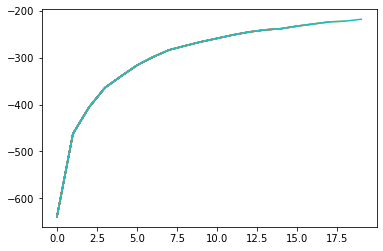

In [487]:
# Using the elbow method to see what k is best
numclusters=[]
for num in range(1,21):
    numclusters.append(sklearn.cluster.KMeans(n_clusters=num).fit(scaled_data).score(scaled_data))
    matplotlib.pyplot.plot(numclusters)

##### Using the elbow method I choose 5 to be the number of clusters

In [493]:
df['cluster_num'] = pd.Series(range(len(df))) # Creating the new column
df['cluster_num'] = sklearn.cluster.KMeans(n_clusters=5).fit(scaled_data).labels_ # Clustering the scaled data

In [494]:
df.groupby('cluster_num')['min', 'pts', 'fg3m', 'fg3_pct', 'fta', 'position'].mean()
df.groupby('cluster_num').mean()

/tmp/ipykernel_92127/2694423314.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('cluster_num')['min', 'pts', 'fg3m', 'fg3_pct', 'fta', 'position'].mean()


,fg3m,fgm,ft_pct,fta,ftm,min,pts,position
cluster_num,,,,,,,,
0,0.206897,4.574713,0.361103,2.091954,1.183908,26.582069,10.540230,0.448276
1,2.082759,4.062069,0.028731,0.262069,0.062069,23.372207,10.268966,0.041379
2,0.503106,2.875776,0.866814,2.795031,2.341615,22.161988,8.596273,0.062112
3,2.398601,7.167832,0.856399,5.202797,4.328671,31.884406,21.062937,0.048951
4,0.054545,0.812121,0.035352,0.266667,0.078788,9.884545,1.757576,0.109091


After analyzing these averages for each cluster, this is what I have determined:
1. The first cluster consists of players who play in the paint, their points are the second highest, since they are in the paint they are making more contact with opponents which is why they have the third most amount of free throw attempts which is similar to the "star player" (fourth cluster). This is also proven due to the fact that the average position number for this cluster is .44 which means a lot of these players are centers.

2. The second cluster is a good player who shoots from deep and around the perimeter. This is shown because they have the second most 3-pointers made by a lot, not a lot of free throws because they don't make a lot of contact and have the second highest three point percentage (second to the star player) by around .28 better than the short-medium player.

3. The third cluster consists of players who score closer to the basket in medium to short ranges. They have the third most free throw attempts by a pretty big margin because they make a lot more contact with opponents and don't have a necessarily high average three pointers made.

4. The fourth cluster is the "star player" who can do it all, they play the most minutes and score the most points by far, they are also the best 3 point shooters by margin.

5. The fifth cluster consists of the worst players/bench players, they get the least amount of points and the least minutes played, have nearly 0 shots per game and their field goals made our about .81 compared to the second lowest 4.06.
